 A machine learning model using the ChEMBL bioactivity data. The ChEMBL Database is a curated repository of bioactivity data for over 2 million compounds. It is derived from more than 76,000 documents and 1.2 million assays, covering 13,000 targets, 1,800 cell types, and 33,000 indications. [Data as of March 25, 2020; ChEMBL version 26].

In [ ]:
! pip install "requests-cache<1.0"
! pip install "chembl_webresource_client<0.10.8"


     |████████████████████████████████| 48 kB 2.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
  Using cached easydict-1.13-py3-none-any.whl (6.8 kB)
     |████████████████████████████████| 670 kB 8.9 MB/s 
     |████████████████████████████████| 60 kB 6.8 MB/s 
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: requests-cache
    Found existing installation: requests-cache 0.9.8
    Uninstalling requests-cache-0.9.8:
      Successfully uninstalled requests-cache-0.9.8


In [ ]:
#Installng Libraries
#Installing chembl

! pip install chembl_webresource_client


**Importing libraries**


In [ ]:
#Import Important Libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

**`Search for Target protein:  Butyrylcholinesterase `**
, BChE is involved in breaking down acetylcholine, making it relevant for neurological drug discovery, including Alzheimer's research

In [ ]:
# Target search
tar = new_client.target
target_query = tar.search('Butyrylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Butyrylcholinesterase,25.0,False,CHEMBL1914,"[{'accession': 'P06276', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Equus caballus,Butyrylcholinesterase,25.0,False,CHEMBL5077,"[{'accession': 'Q9N1N9', 'component_descriptio...",SINGLE PROTEIN,9796
2,[],Equus caballus,Cholinesterase,25.0,False,CHEMBL5763,"[{'accession': 'P81908', 'component_descriptio...",SINGLE PROTEIN,9796
3,[],Homo sapiens,Cholinesterases; ACHE & BCHE,25.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
4,[],Canis lupus familiaris,Cholinesterase,25.0,False,CHEMBL4630814,"[{'accession': 'P32750', 'component_descriptio...",SINGLE PROTEIN,9615
5,[],Mus musculus,Butyrylcholinesterase,18.0,False,CHEMBL2528,"[{'accession': 'Q03311', 'component_descriptio...",SINGLE PROTEIN,10090
6,[],Rattus norvegicus,Butyrylcholinesterase,18.0,False,CHEMBL3403,"[{'accession': 'Q9JKC1', 'component_descriptio...",SINGLE PROTEIN,10116
7,[],Rattus norvegicus,Acetylcholinesterase and butyrylcholinesterase...,10.0,False,CHEMBL2111475,"[{'accession': 'P37136', 'component_descriptio...",SELECTIVITY GROUP,10116


Select and Retrieve bioactivity data for Human Butyrylcholinesterase

In [ ]:
select_target = targets.target_chembl_id[0]
select_target

'CHEMBL1914'

In [ ]:
#Retrieving only Bioactivity data of human butyrylcholinesterase (selected id)
activity = new_client.activity
res = activity.filter(target_chembl_id=select_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33968,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.92
1,None,None,37562,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.9
2,None,None,37566,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38901,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.0
4,None,None,41169,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,None,None,25720749,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0
5073,None,None,25720750,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0
5074,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720751,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,118.8
5075,None,None,25720752,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0


In [ ]:
#save the resulting bioactivity data to a CSV file bioactivity_data.csv.
df.to_csv('butyrylcholinesterase_01_bioactivity_data_raw.csv', index=False)



**DEALING WITH MISSING DATA**






In [ ]:
#If any compounds has missing value for the standard_value and canonical_smiles column then drop it.
df1 = df[df.standard_value.notna()]
df1 = df1[df.canonical_smiles.notna()]
df1


<ipython-input-13-bb5ca4155c4e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33968,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.92
1,None,None,37562,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.9
2,None,None,37566,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38901,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.0
4,None,None,41169,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,None,None,25720749,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0
5073,None,None,25720750,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0
5074,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720751,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,118.8
5075,None,None,25720752,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0


In [ ]:
len(df1.canonical_smiles.unique())


4066

In [ ]:
df1_nr = df1.drop_duplicates(['canonical_smiles'])
df1_nr



,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33968,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.92
1,None,None,37562,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.9
2,None,None,37566,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38901,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.0
4,None,None,41169,[],CHEMBL654878,Inhibitory concentration against butyrylcholin...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720748,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,61.3
5072,None,None,25720749,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0
5073,None,None,25720750,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,300.0
5074,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720751,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390768,Inhibition of BChE (unknown origin) using BTCI...,B,None,None,BAO_0000190,...,Homo sapiens,Butyrylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,118.8


**Data pre-processing of the bioactivity data
Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df2 = df1_nr[selection]
df2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0
...,...,...,...
5071,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,61300.0
5072,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,300000.0
5073,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,300000.0
5074,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,118800.0


In [ ]:
df2.to_csv('butyrylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)


**Classifying compounds based on their activity levels:**

The bioactivity data is measured in IC50 units. Compounds with IC50 values below 1,000 nM are categorized as active, while those exceeding 10,000 nM are labeled as inactive. Compounds with IC50 values between 1,000 and 10,000 nM are classified as intermediate.

In [ ]:
df3 = pd.read_csv('butyrylcholinesterase_02_bioactivity_data_preprocessed.csv')


In [ ]:

bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0,active
...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,61300.0,inactive
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,300000.0,inactive
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,300000.0,inactive
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,118800.0,inactive


In [ ]:
df4.to_csv('butyrylcholinesterase_03_bioactivity_data_curated.csv', index=False)


In [ ]:
! zip butyrylcholinesteras.zip *.csv

updating: butyrylcholinesterase_01_bioactivity_data_raw.csv (deflated 92%)
updating: butyrylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)
updating: butyrylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: BcHE_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: Butyrylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)


In [ ]:
! ls -l

total 88460
-rw-r--r-- 1 root root   413332 Feb 20 16:01 BcHE_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  3243138 Feb 20 16:15 butyrylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root   308150 Feb 20 16:17 butyrylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   345779 Feb 20 16:19 butyrylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   563131 Feb 20 16:01 Butyrylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   616612 Feb 20 16:19 butyrylcholinesteras.zip
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    14135 Feb 20 16:01 plot_bioactivity_class.pdf
drwxr-xr-x 1 root root     4096 Feb 18 14:20 sample_data


In [ ]:
#copy to drive

## **Exploratory Data Analysis**
 Descriptor Calculation and Exploratory Data Analysis.

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2025-02-20 16:20:00--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   217MB/s    in 0.4s    

2025-02-20 16:20:00 (217 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1

In [ ]:
df = df4
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0,active
...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,61300.0,inactive
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,300000.0,inactive
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,300000.0,inactive
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,118800.0,inactive


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,920.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,900.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,1000.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,200.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
4061,CHEMBL1235966,61300.0,inactive,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2
4062,CHEMBL5420095,300000.0,inactive,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...
4063,CHEMBL5425587,300000.0,inactive,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2
4064,CHEMBL5434024,118800.0,inactive,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2


**CALCULATE LIPINSKI DESCRIPTORS**

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton

Octanol-water partition coefficient (LogP) < 5

Hydrogen bond donors < 5

Hydrogen bond acceptors < 10

In [ ]:
!pip install rdkit-pypi


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
import pandas as pd

def lipinski(smiles):
    moldata = [Chem.MolFromSmiles(s) for s in smiles]

    data = [
        [Descriptors.MolWt(mol), Descriptors.MolLogP(mol),
         Lipinski.NumHDonors(mol), Lipinski.NumHAcceptors(mol)]
        for mol in moldata
    ]

    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    return pd.DataFrame(data, columns=column_names)


In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0,6
1,376.913,4.5546,0,5
2,426.851,5.3574,0,5
3,404.845,4.7069,0,5
4,346.334,3.0953,0,6
...,...,...,...,...
4061,327.380,2.7705,2,5
4062,372.441,2.9237,2,5
4063,354.382,2.7874,2,5
4064,324.356,2.7788,2,4


In [ ]:
#OR

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd

def lipinski(smiles):
    """Compute Lipinski descriptors for a list of SMILES strings, ensuring only valid molecules are processed."""
    valid_mols = []

    for s in smiles:
        if pd.notna(s) and isinstance(s, str) and s.strip():  # Ensure it's a valid, non-empty string
            mol = Chem.MolFromSmiles(s)
            if mol:  # Only keep valid molecules
                valid_mols.append(mol)

    # Compute descriptors only for valid molecules
    data = [
        [Descriptors.MolWt(mol), Descriptors.MolLogP(mol),
         Lipinski.NumHDonors(mol), Lipinski.NumHAcceptors(mol)]
        for mol in valid_mols
    ]

    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    return pd.DataFrame(data, columns=column_names)

# Ensure SMILES are valid before calling the function
df_clean_smiles = df_clean_smiles.dropna(subset=['canonical_smiles'])  # Drop NaN values
df_clean_smiles = df_clean_smiles[df_clean_smiles['canonical_smiles'].astype(str).str.strip() != ""]  # Remove empty strings

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0,6
1,376.913,4.5546,0,5
2,426.851,5.3574,0,5
3,404.845,4.7069,0,5
4,346.334,3.0953,0,6
...,...,...,...,...
4061,327.380,2.7705,2,5
4062,372.441,2.9237,2,5
4063,354.382,2.7874,2,5
4064,324.356,2.7788,2,4


In [ ]:
df # two dataframes to be combined df and df_lipinski

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0,active
...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,61300.0,inactive
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,300000.0,inactive
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,300000.0,inactive
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,118800.0,inactive


In [ ]:
#combine dataframes df and df_lipinski
df_combine = pd.concat([df,df_lipinski], axis=1)
df_combine


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,920.0,active,312.325,2.8032,0,6
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,900.0,active,376.913,4.5546,0,5
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0,5
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1000.0,active,404.845,4.7069,0,5
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,200.0,active,346.334,3.0953,0,6
...,...,...,...,...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,61300.0,inactive,327.380,2.7705,2,5
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,300000.0,inactive,372.441,2.9237,2,5
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,300000.0,inactive,354.382,2.7874,2,5
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,118800.0,inactive,324.356,2.7788,2,4


### **Transforming IC50 to pIC50**  

To achieve a more uniform distribution of IC50 data, we will convert it to a **negative logarithmic scale** using **-log10(IC50)**.  

The custom function **`pIC50()`** will:  
1. Extract IC50 values from the **`standard_value`** column and convert them from **nM to M** by multiplying by **10⁻⁹**.  
2. Apply **-log10 transformation** to the molar values.  
3. Remove the **`standard_value`** column and create a new **`pIC50`** column.  
4. Cap values greater than **100,000,000** at **100,000,000** to prevent negative logarithmic results.















In [ ]:
## https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    PIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        PIC50.append(-np.log10(molar))

    input['pIC50'] = PIC50
    x= input.drop(columns=['standard_value_norm'])

    return x

In [ ]:
df_combine.standard_value.describe()


,standard_value
count,4.066000e+03
mean,5.026319e+12
std,2.926068e+14
min,0.000000e+00
25%,2.000000e+02
50%,3.185000e+03
75%,2.100000e+04
max,1.862087e+16


In [ ]:
-np.log10( (10**-9)* 100000000 )



1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])  # Fix the error here

    return x


In [ ]:
df_norm = norm_value(df_combine)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0,6,920.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0,5,900.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0,5,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0,5,1000.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0,6,200.0
...,...,...,...,...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2,5,61300.0
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,inactive,372.441,2.9237,2,5,300000.0
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,354.382,2.7874,2,5,300000.0
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2,4,118800.0


In [ ]:
df_norm.standard_value_norm.describe()


,standard_value_norm
count,4.066000e+03
mean,2.172511e+05
std,3.974882e+06
min,0.000000e+00
25%,2.000000e+02
50%,3.185000e+03
75%,2.100000e+04
max,1.000000e+08


In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-34-59d3137167bd>:10: RuntimeWarning: divide by zero encountered in log10
  PIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0,6,6.036212
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0,5,6.045757
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0,5,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0,5,6.000000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0,6,6.698970
...,...,...,...,...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2,5,4.212540
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,inactive,372.441,2.9237,2,5,3.522879
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,354.382,2.7874,2,5,3.522879
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2,4,3.925184


In [ ]:
import numpy as np

def pIC50(input):
    PIC50 = []

    for i in input['standard_value_norm']:
        molar = i * 1e-9  # Convert nM to M

        # Prevent log(0) or log(negative) by replacing with a very small value
        if molar <= 0:
            molar = 1e-10

        PIC50.append(-np.log10(molar))

    input['pIC50'] = PIC50
    return input.drop(columns=['standard_value_norm'])

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:  # Cap max value
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    return input.drop(columns=['standard_value'])

df_norm = norm_value(df_combine)
df_final = pIC50(df_norm)  # Apply the fix
df_final


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0,6,6.036212
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0,5,6.045757
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0,5,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0,5,6.000000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0,6,6.698970
...,...,...,...,...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2,5,4.212540
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,inactive,372.441,2.9237,2,5,3.522879
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,354.382,2.7874,2,5,3.522879
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2,4,3.925184


In [ ]:
df_final.pIC50.describe()


,pIC50
count,4066.000000
mean,5.765988
std,1.525284
min,1.000000
25%,4.677781
50%,5.496891
75%,6.698970
max,14.000000


In [ ]:
df_final.to_csv('Butyrylcholinesterase_04_bioactivity_data_3class_pIC50.csv')


In [ ]:
########REMOVING THE INTERMEDIATE BIOACTIVITY CLASS#################
df_2class = df_final.loc[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0,6,6.036212
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0,5,6.045757
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0,5,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0,5,6.000000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0,6,6.698970
...,...,...,...,...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2,5,4.212540
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,inactive,372.441,2.9237,2,5,3.522879
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,354.382,2.7874,2,5,3.522879
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2,4,3.925184


In [ ]:

df_2class.to_csv('BcHE_05_bioactivity_data_2class_pIC50.csv')

# **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<ipython-input-49-7bcf142333df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#1f77b4', '#2ca02c'])


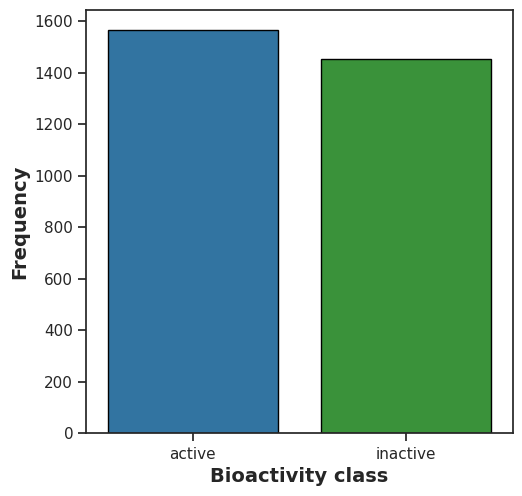

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['#1f77b4', '#2ca02c'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')
plt.show()


# **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

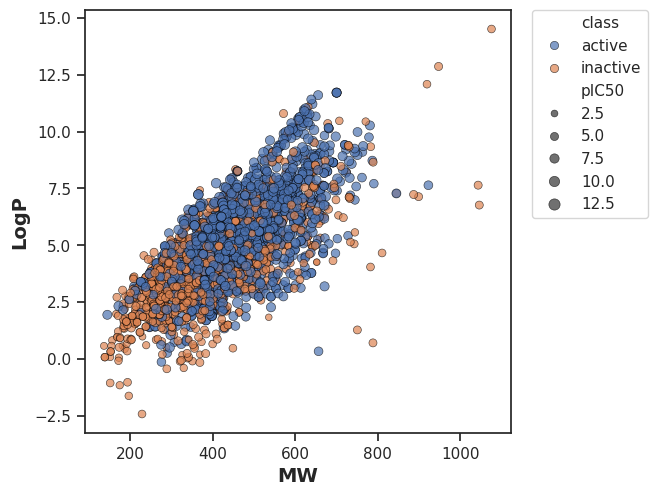

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# **MW versus LogP**

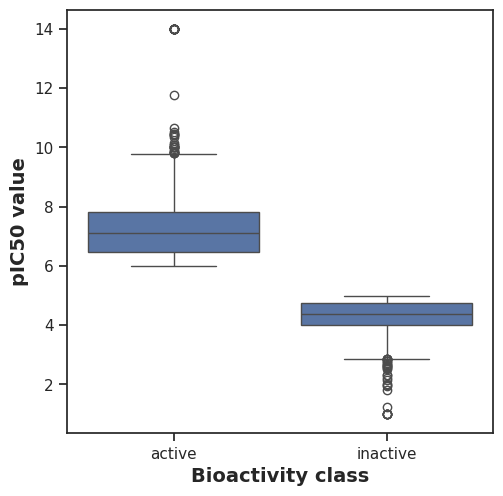

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2273832.0,0.0,0.05,Different distribution (reject H0)


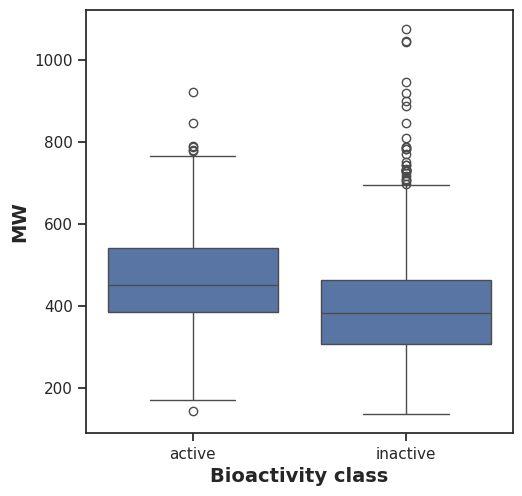

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1534855.5,3.708732e-62,0.05,Different distribution (reject H0)


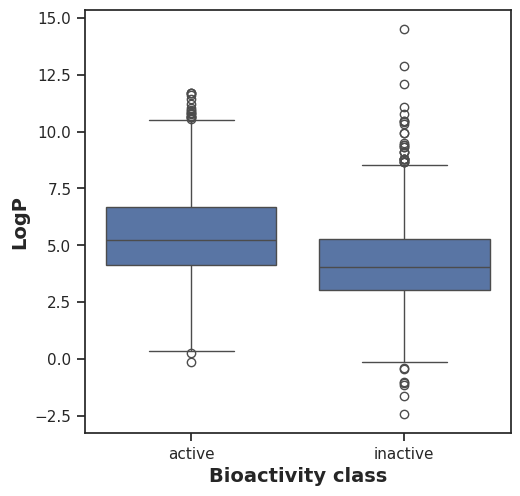

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1547412.5,5.039859e-66,0.05,Different distribution (reject H0)


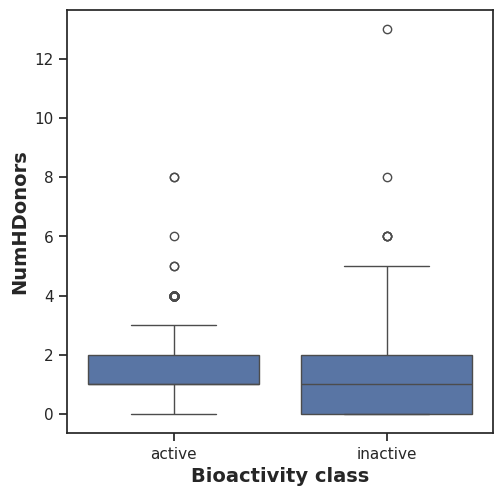

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1529140.0,4.401902e-65,0.05,Different distribution (reject H0)


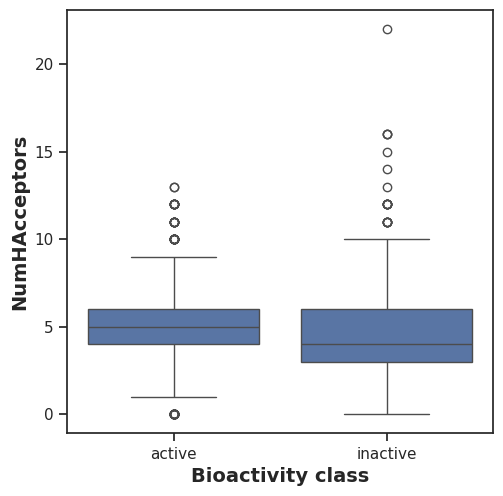

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1199741.5,0.007858,0.05,Different distribution (reject H0)


### **Interpretation of Statistical Results**  

#### **Box Plots – pIC50 Values**  
Examining the **pIC50 values**, there is a statistically significant difference between **active** and **inactive** compounds (**p < 0.05**). This is expected, as the threshold values used for classification were:  
- **Actives:** IC50 < 1,000 nM → pIC50 > 6  
- **Inactives:** IC50 > 10,000 nM → pIC50 < 5  

The significant difference suggests that the classification based on IC50 values is **well-defined and meaningful** in distinguishing active vs. inactive compounds.

---

#### **Lipinski’s Descriptors**  
All **four Lipinski descriptors** (Molecular Weight, LogP, Number of Hydrogen Donors, and Number of Hydrogen Acceptors) exhibited **statistically significant differences (p < 0.05)** between actives and inactives. This suggests that physicochemical properties influence the bioactivity of compounds.

1. **Molecular Weight (MW)**  
   - **p = 3.71 × 10⁻⁶²** → Highly significant difference.  
   - Suggests that **active compounds tend to have different molecular weights compared to inactive ones**, possibly indicating a preference for compounds of a certain size range in binding to the target.  

2. **LogP (Lipophilicity)**  
   - **p = 5.04 × 10⁻⁶⁶** → Highly significant difference.  
   - LogP affects a compound's ability to permeate cell membranes. A clear distinction suggests that **lipophilicity plays a role in determining whether a compound is active or inactive**.  

3. **Number of Hydrogen Donors (NumHDonors)**  
   - **p = 4.40 × 10⁻⁶⁵** → Highly significant difference.  
   - The difference indicates that **hydrogen bonding interactions influence bioactivity**, with actives and inactives showing distinct patterns.  

4. **Number of Hydrogen Acceptors (NumHAcceptors)**  
   - **p = 0.0079** → Statistically significant difference.  
   - While less extreme than the other descriptors, the difference still suggests that the **ability to form hydrogen bonds** affects compound activity.  

---

### **Summary**  
- **pIC50 values** confirm that the **classification of active vs. inactive compounds is statistically meaningful**.  
- **All Lipinski’s descriptors show significant differences**, suggesting that **molecular weight, lipophilicity, and hydrogen bonding capacity contribute to compound activity**.  
- These findings reinforce the idea that **drug-like properties influence a compound’s likelihood of being bioactive**. 🚀

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: BcHE_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: butyrylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: Butyrylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: butyrylcholinesterase_01_bioactivity_data_raw.csv (deflated 92%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: butyrylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)


# **We will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building.**
# **Download PaDEL-Descriptor**





In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-02-20 17:04:39--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-02-20 17:04:39--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  46.9MB/s    in 0.5s    

2025-02-20 17:04:41 (46.9 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-02-20 17:04:41--  https://git

In [ ]:
! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

# **Load Bioactivity Data**

In [ ]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0,6,6.036212
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0,5,6.045757
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0,5,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0,5,6.000000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0,6,6.698970
...,...,...,...,...,...,...,...,...
4061,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2,5,4.212540
4062,CHEMBL5420095,COc1cc2c(c(O)c1OC)CC[N@+]1(C)Cc3c(ccc(O)c3OC)C...,inactive,372.441,2.9237,2,5,3.522879
4063,CHEMBL5425587,COc1cc2c(c(O)c1OC)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,354.382,2.7874,2,5,3.522879
4064,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2,4,3.925184


In [ ]:
select = ['canonical_smiles','molecule_chembl_id']
df_final_select = df_final[select]
df_final_select.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
df_final = df_final_select

In [ ]:
! cat molecule.smi | head -5


CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [ ]:
! cat molecule.smi | wc -l


4066


# **Fingerprint descriptors**

Calculate PaDEL descriptors



In [ ]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh


Processing CHEMBL133897 in molecule.smi (1/4066). 
Processing CHEMBL336398 in molecule.smi (2/4066). 
Processing CHEMBL131588 in molecule.smi (3/4066). 
Processing CHEMBL130628 in molecule.smi (4/4066). Average speed: 3.67 s/mol.
Processing CHEMBL130478 in molecule.smi (5/4066). Average speed: 2.68 s/mol.
Processing CHEMBL337486 in molecule.smi (7/4066). Average speed: 1.77 s/mol.
Processing CHEMBL130098 in molecule.smi (6/4066). Average speed: 2.11 s/mol.
Processing CHEMBL336538 in molecule.smi (8/4066). Average speed: 1.53 s/mol.
Processing CHEMBL131051 in molecule.smi (9/4066). Average speed: 1.37 s/mol.
Processing CHEMBL341437 in molecule.smi (10/4066). Average speed: 1.23 s/mol.
Processing CHEMBL335033 in molecule.smi (11/4066). Average speed: 1.16 s/mol.
Processing CHEMBL338720 in molecule.smi (12/4066). Average speed: 1.05 s/mol.
Processing CHEMBL339995 in molecule.smi (13/4066). Average speed: 1.15 s/mol.
Processing CHEMBL106126 in molecule.smi (15/4066). Average speed: 1.00 s/

In [ ]:
! ls -l


total 205828
-rw-r--r-- 1 root root   413333 Feb 20 16:42 BcHE_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  3243138 Feb 20 16:15 butyrylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root   308150 Feb 20 16:17 butyrylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   345779 Feb 20 16:19 butyrylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   563132 Feb 20 16:41 Butyrylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   616612 Feb 20 16:19 butyrylcholinesteras.zip
-rw-r--r-- 1 root root  7239481 Feb 20 17:35 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Feb 20 17:04 __MACOSX
-rw-r--r-- 1 root root      125 Feb 20 16:44 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      123 Feb 20 16:44 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      133 Feb 20 16:46 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      131 Feb 20 16:45 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root   

# **Preparing the X and Y Data Matrices**

# **X data matrix**

In [ ]:
df_final_X = pd.read_csv('descriptors_output.csv')
df_final_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,CHEMBL1235966,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4062,CHEMBL5420095,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4063,CHEMBL5425587,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4064,CHEMBL5434024,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final_X = df_final_X.drop(columns=['Name'])
df_final_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **Y variable**
# **Convert IC50 to pIC50**

In [ ]:
df_final_Y = df_final['pIC50']
df_final_Y

,pIC50
0,6.036212
1,6.045757
2,4.301030
3,6.000000
4,6.698970
...,...
4061,4.212540
4062,3.522879
4063,3.522879
4064,3.925184


In [ ]:
print(df_norm.columns)  # List all column names
df_final = pIC50(df_norm)
print(df_final.columns)  # Should contain 'pIC50'


Index(['molecule_chembl_id', 'canonical_smiles', 'class', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'standard_value_norm', 'pIC50'],
      dtype='object')
Index(['molecule_chembl_id', 'canonical_smiles', 'class', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')


In [ ]:
print(df_norm.columns)  # Should contain 'standard_value_norm'
print(df_norm['standard_value_norm'].head())  # Check for valid values


Index(['molecule_chembl_id', 'canonical_smiles', 'class', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'standard_value_norm', 'pIC50'],
      dtype='object')
0      920.0
1      900.0
2    50000.0
3     1000.0
4      200.0
Name: standard_value_norm, dtype: float64


# **Combining X and Y variable**

In [ ]:
dataset_final = pd.concat([df_final_X,df_final_Y], axis=1)
dataset_final

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.036212
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.045757
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.212540
4062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
4063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
4064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.925184


In [ ]:
dataset_final.to_csv('BcHE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [122]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
import os
folder_path = "/content/drive/My Drive/Bioactivity_Analysis"
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist


In [ ]:
import os
import shutil

# Specify the folder where files should be moved
folder_path = "/content/drive/My Drive/Bioactivity_Analysis"

# List of files to move (you can expand this list as needed)
files_to_move = [
    "BcHE_05_bioactivity_data_3class_pIC50.csv",
    "BcHE_06_bioactivity_data_3class_pIC50_pubchem_fp.csv",
    "butyrylcholinesterase_01_bioactivity_data_raw.csv",
    "butyrylcholinesterase_02_bioactivity_data_preprocessed.csv",
    "butyrylcholinesterase_03_bioactivity_data_curated.csv",
    "Butyrylcholinesterase_04_bioactivity_data_3class_pIC50.csv"
]

# Check if folder exists, if not, create it
os.makedirs(folder_path, exist_ok=True)

# Loop through each file and move it to the folder
for file in files_to_move:
    if os.path.exists(file):  # Ensure the file exists
        shutil.move(file, folder_path)
        print(f"Moved: {file}")
    else:
        print(f"File not found: {file}")


In [ ]:
!ls -l

# **Let's download the CSV file to your local computer for the Part 3B (Model Building).**

we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.



In [ ]:
#IMPORT IMPORTANT LIBRARIES


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset_final

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.036212
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.045757
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.212540
4062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
4063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
4064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.925184


# **Input features**

In [ ]:
X = dataset_final.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#**Output Features**

In [ ]:
Y = dataset_final.pIC50
Y


,pIC50
0,6.036212
1,6.045757
2,4.301030
3,6.000000
4,6.698970
...,...
4061,4.212540
4062,3.522879
4063,3.522879
4064,3.925184


# **Let's examine the data dimension**

In [ ]:
X.shape

(4066, 881)

In [ ]:
Y.shape

(4066,)

# **Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape


(4066, 146)

In [ ]:
#Data split (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape


((3252, 146), (3252,))

In [ ]:
X_test.shape, Y_test.shape


((814, 146), (814,))

# **Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5534209975079591

In [ ]:
Y_pred = model.predict(X_test)


# **Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

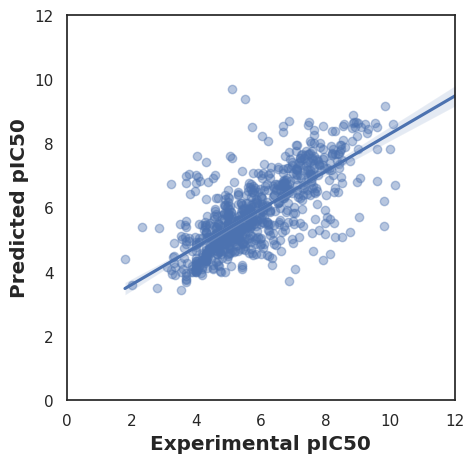

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show